In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score


In [ ]:
#Read the dataset into python environment
df=pd.read_csv('/content/credit.csv')

# EDA

In [ ]:
#display first 4 rows and columns
df.head(4)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good


In [ ]:
#Display last 3 columns and rows
df.tail(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [ ]:
#Display the names of columns in dataset credit
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#shape of dataset(no.of rows & no.of columns)
df.shape

(100000, 28)

In [ ]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

7 catagorical columns and 21 numerical columns presented in the dataset

In [ ]:
#Check the null values in the dataset
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There are no missing values in any of the columns of dataset

In [ ]:
#Summary statistical information of numerical variables
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
#Summary statistical information of catagorivariables
df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


from this i know
There are 3 unique credit score categories in the dataset and most frequent credit score category is "Standard" which appears 53,174 times.

In [ ]:
# check duplicates
duplicates = df.duplicated()
value_counts = duplicates.value_counts()

print(value_counts)


False    100000
dtype: int64


Here all rows are unique

In [ ]:
# Define numerical & categorical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

#Display columns names
print('We have {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical columns : {}'.format(len(cat_cols), cat_cols))

We have 21 numerical columns : ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

We have 7 categorical columns : ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [ ]:
# To check the independence of rows
df.duplicated().sum()

0

In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [ ]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df['Type_of_Loan'].value_counts()

No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday Loan, Mortgag

In [ ]:
# Display only the categories of Type_of_Loan
type_of_loan_categories = df['Type_of_Loan'].value_counts().index.tolist()
print("Categories of Type_of_Loan:\n")
print(type_of_loan_categories)


Categories of Type_of_Loan:

['No Data', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan', 'Personal Loan, and Student Loan', 'Not Specified, and Payday Loan', 'Mortgage Loan, and Home Equity Loan', 'Student Loan, and Payday Loan', 'Student Loan, and Credit-Builder Loan', 'Credit-Builder Loan, and Not Specified', 'Payday Loan, and Debt Consolidation Loan', 'Payday Loan, and Auto Loan', 'Mortgage Loan, and Not Specified', 'Payday Loan, and Personal Loan', 'Auto Loan, and Personal Loan', 'Payday Loan, and Student Loan', 'Credit-Builder Loan, and Mortgage Loan', 'Personal Loan, and Credit-Builder Loan', 'Auto Loan, and Payday Loan', 'Debt Consolidation Loan, and Home Equity Loan', 'Not Specified, and Auto Loan', 'Home Equity Loan, and Student Loan', 'Home Equity Loan, and Not Specified', 'Student Loan, and Student Loan', 'Credit-Builder Loan, and Auto Loan', 'Auto Loan, and D

In [ ]:
# calculate the proportion (percentage) of each unique value in that column
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Jessicad              0.048
Langep                0.048
Stevex                0.048
Vaughanl              0.040
Ronald Groverk        0.040
                      ...  
Breidthardtj          0.008
Sven Egenterx         0.008
Antonella Ciancioc    0.008
Valentina Zan         0.008
Nicks                 0.008
Name: Name, Length: 10128, dtype: float64
---------------------------
Lawyer           7.096
Engineer         6.864
Architect        6.824
Mechanic         6.776
Scientist        6.744
Accountant       6.744
Developer        6.720
Media_Manager    6.720
Teacher          6.672
Entrepreneur     6.648
Doctor           6.568
Journalist       6.536
Manager          6.432
Musician         6.352
Writer           6.304
Name: Occupation, dtype: float64
---------------------------
No Data                                                                                                                               11.408
Not Specified                                                              

# DATA VISUALIZATION

UNIVARIATE ANALYSIS

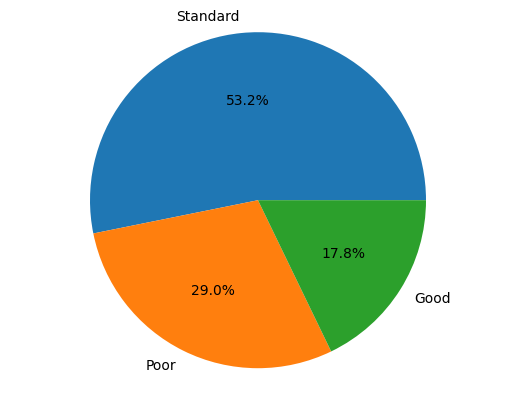

In [ ]:
# Pie chart of credit score
plt.pie(df['Credit_Score'].value_counts(), labels=['Standard', 'Poor','Good'], autopct='%0.1f%%')
plt.axis('equal')
plt.show()

The majority falling within a standard range, a significant portion classified as poor, and a smaller proportion categorized as good.

Each histogram provides insights into the distribution of values for the corresponding numerical variable.

BIVARIATE ANALYSIS

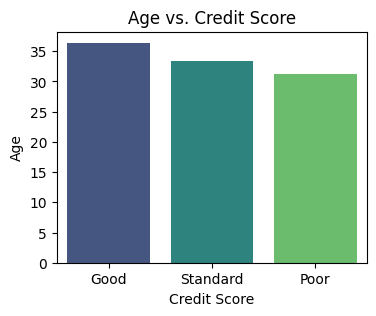

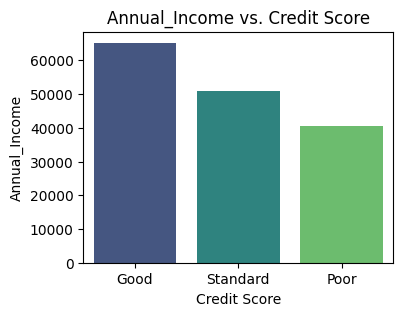

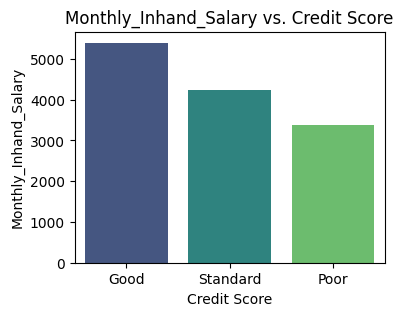

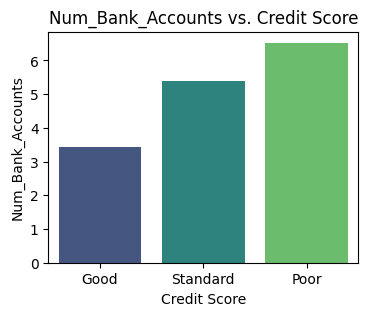

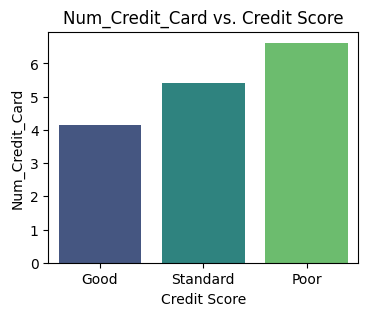

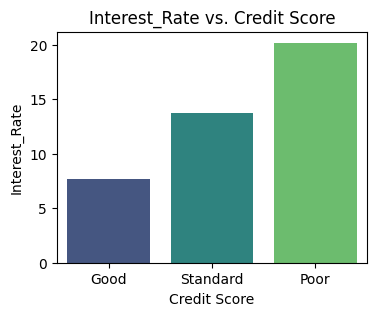

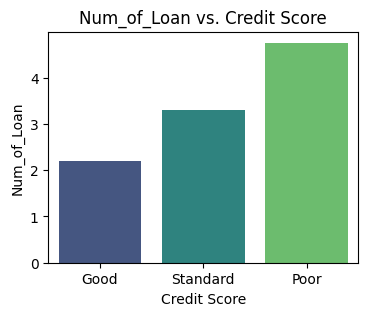

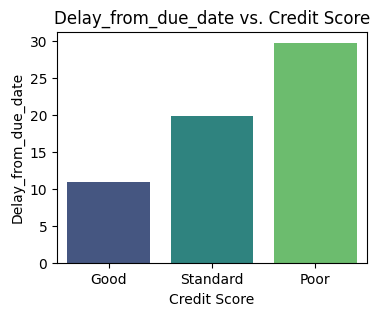

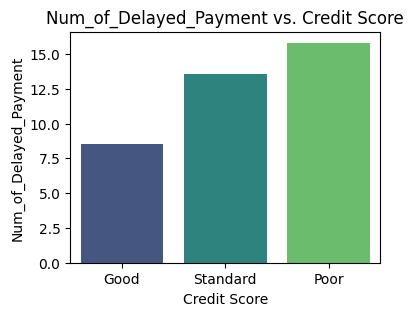

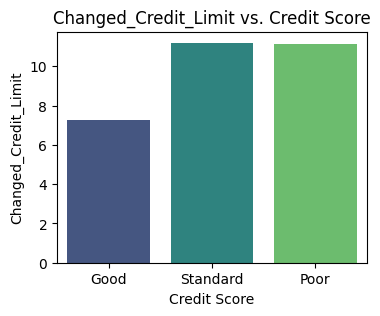

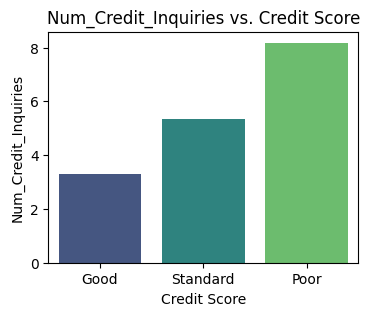

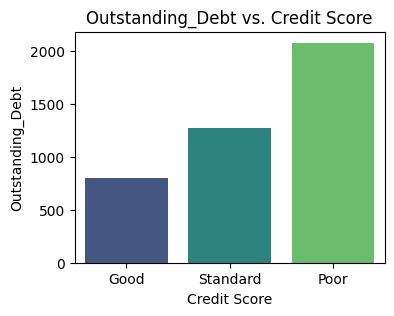

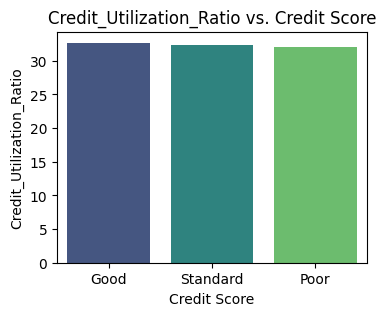

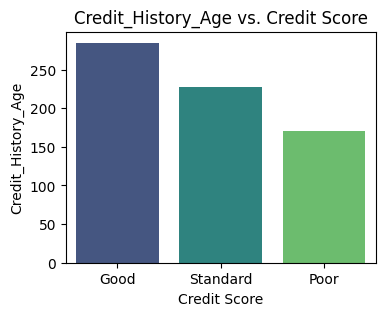

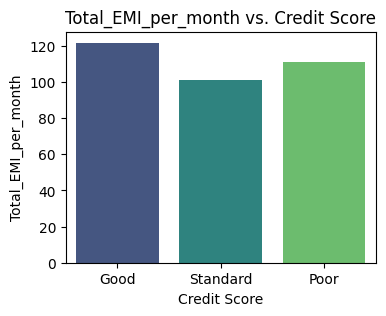

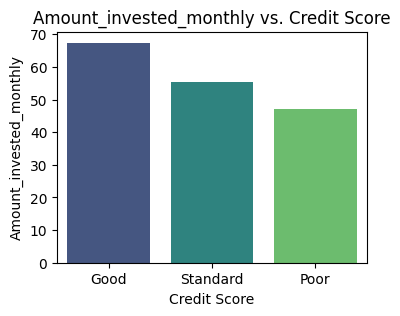

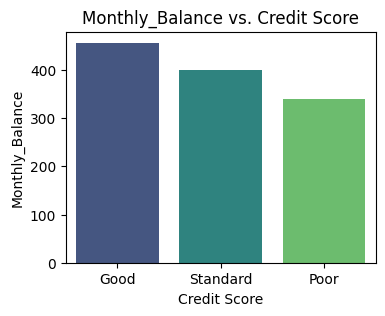

In [ ]:
#Distribution of creditscore
# List of numerical columns (excluding 'Credit_Score')
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Iterate through each numerical column
for column in numerical_columns:
    # Create a bar plot for the current column and 'Credit_Score'
    plt.figure(figsize=(4, 3))
    sns.barplot(x='Credit_Score', y=column, data=df, errorbar=None, hue='Credit_Score', palette='viridis', legend=False)
    plt.xlabel('Credit Score')
    plt.ylabel(column)
    plt.title(f'{column} vs. Credit Score')
    plt.show()



There is a relationship between annual income and credit score.higher annual incomes tend to have higher credit scores. This is because higher income levels may indicate greater financial stability and ability to manage credit responsibly, leading to a better credit history and higher credit score.

 A relationship between age and credit score. Generally, older individuals may have higher credit scores, while younger individuals may have lower credit scores.
A potential correlation between Monthly Inhand Salary and Credit Score. Higher Monthly Inhand Salaries are associated with higher credit scores, while lower salaries are associated with poorer credit scores.
relationship between the number of bank accounts and credit score.when bank accounts increased credit score decreased.

A relationship between age and credit score. Generally, older individuals may have higher credit scores, while younger individuals may have lower credit scores.
A potential correlation between Monthly Inhand Salary and Credit Score. Higher Monthly Inhand Salaries are associated with higher credit scores, while lower salaries are associated with poorer credit scores.
relationship between the number of bank accounts and credit score.when bank accounts increased credit score decreased.

 number of credit cards(higher credit scores may have more credit cards), intrest rates(Higher credit scores may be associated with lower interest rates) and number of loans(higher credit scores may have a higher likelihood of being approved for loans) are dependend credit score

 delay from the due date related to an individual's credit score, with longer delays potentially indicating a higher risk profile and thus a poorer credit score.

i recognised checked all numerical  columns are related to credit score

# HEATMAP

<ipython-input-24-9d5527ce7cd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


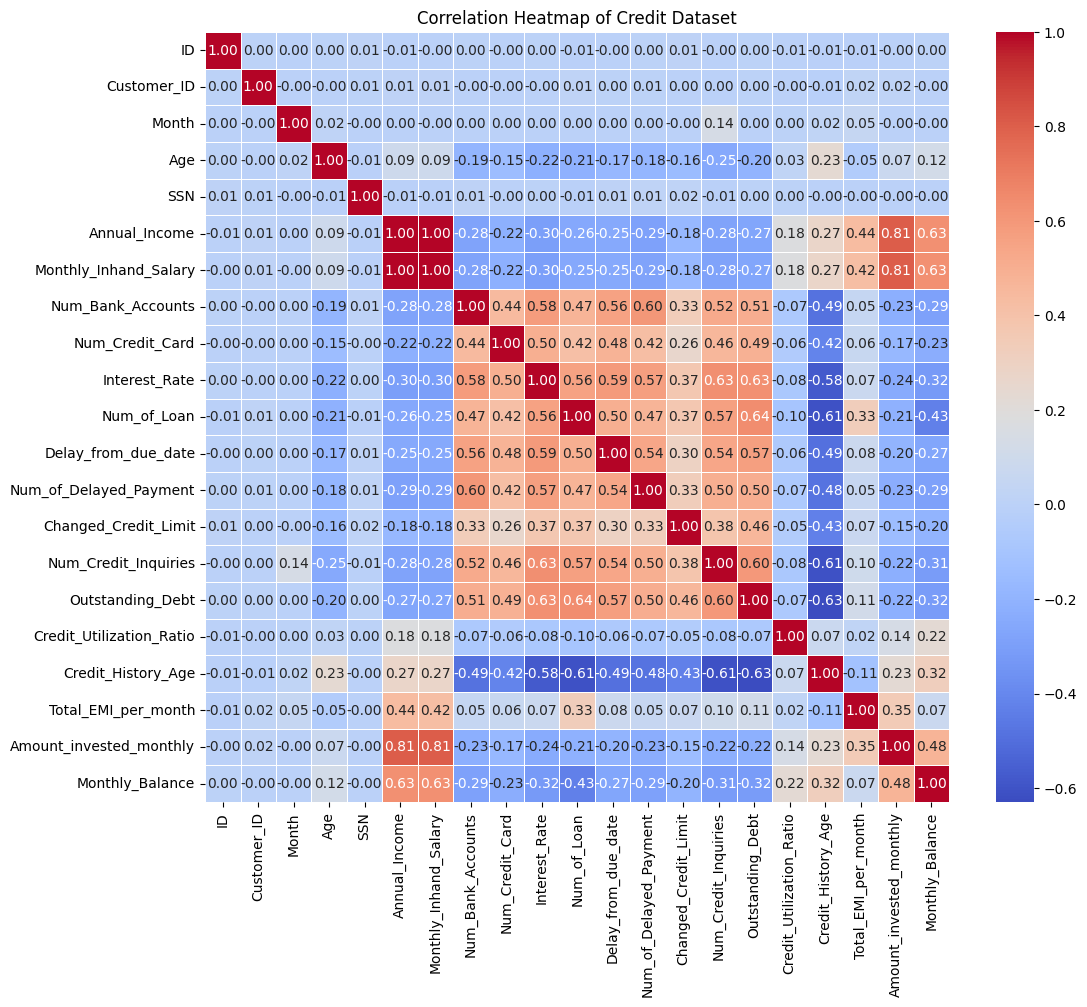

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Credit Dataset')
plt.show()

a perfect positive correlation between "Annual Income" and "Monthly Inhand Salary".There is a positive correlation between  'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',       'Num_Credit_Inquiries', 'Outstanding_Debt'.And these columns have a strong  negative correlationwith credit_history_age.

# OUTLIERS DETECTION

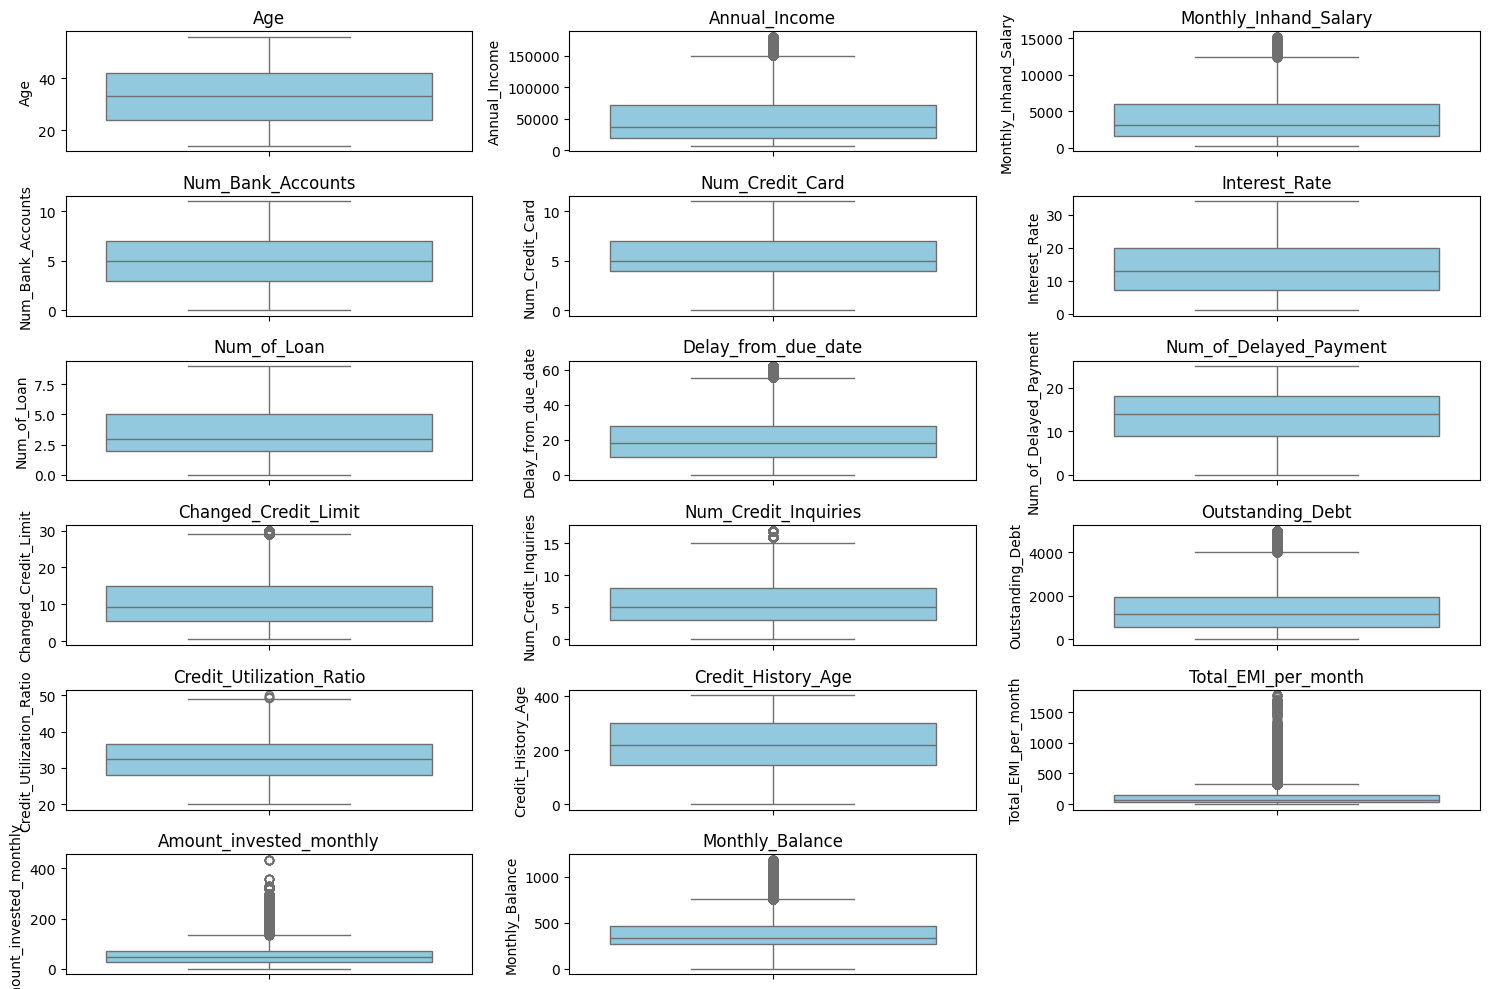

In [ ]:
#box plot
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                     'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                     'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                     'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                     'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()


'Annual_Income', 'Monthly_Inhand_Salary',  'Delay_from_due_date',  'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',                 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance' in these columns detected outliers

# PREPROCESSING

DATA CLEANING

In [ ]:
df_prep = df.copy()
df_prep

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


HANDLING DUPLICATES

In [ ]:
# remove CustomerID to see duplicate rows
df_prep.drop('Customer_ID', axis=1, inplace=True)
print(f'The number of rows before filtering for duplicate data is {df_prep.shape[0]}')

# remove duplicate rows
df_prep.drop_duplicates(inplace=True)
print(f'The number of rows after filtering duplicate data is {df_prep.shape[0]}')

The number of rows before filtering for duplicate data is 100000
The number of rows after filtering duplicate data is 100000


In [ ]:
# Drop the some columns
df_prep=df_prep.drop(columns=['ID', 'SSN', 'Name'])

In [ ]:
df_prep.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


note..The z-score is a score that measures how many standard deviations a data point is away from the mean.The z-score must be used with a normal distribution, which is one of the prerequisites for calculating a standard deviation. We know that in a normal distribution, over 99% of values fall within 3 standard deviations from the mean. Because of this, we can assume that if a z-score returned is larger than 3 that the value is quite unusual.

HANDLING OUTLIERS

In [ ]:
##zscore
# View total rows before filtering
print(f'The number of rows before filtering outliers is {df_prep.shape[0]}')

# Specify columns with outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date',
                   'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                   'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Handle outliers using z-score for each specified column
filtered_entries = np.array([True] * len(df_prep))
for col in outlier_columns:
    zscore = np.abs(stats.zscore(df_prep[col]))
    filtered_entries = (zscore < 3) & filtered_entries

# Filter DataFrame to remove outliers
df_prep = df_prep[filtered_entries]

# View total rows after filtering
print(f'The number of rows after filtering outliers is {df_prep.shape[0]}')


The number of rows before filtering outliers is 100000
The number of rows after filtering outliers is 94587


Feature Engineering



In [ ]:
# Remove rows with Occupation is `Free Lancer`
df_prep = df_prep[df_prep['Occupation'] != 'Free Lancer']

In [ ]:
# View dimension size of data before encoding
print(f'Data dimensions before encoding are {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

Data dimensions before encoding are 94587 rows and 24 columns


ENCODING

In [ ]:
#Label encoding of Credit_Score
label_mapping = {'Good': 0, 'Standard': 1, 'Poor': 2}

# Map the categories to numerical labels using the defined mapping
df_prep['Credit_Score'] = df_prep['Credit_Score'].map(label_mapping)

In [ ]:
#Label encoding of Payment_of_Min_Amount
payment_mapping = {'Yes': 1, 'No': 0, 'NM': -1}

# Apply label encoding using map
df_prep['Payment_of_Min_Amount'] = df_prep['Payment_of_Min_Amount'].map(payment_mapping)

In [ ]:
#Label encoding of Credit_Mix
credit_mix_mapping = {'Standard': 0, 'Good': 1, 'Bad': 2}

# Apply label encoding using map
df_prep['Credit_Mix'] = df_prep['Credit_Mix'].map(credit_mix_mapping)

In [ ]:
#Label encoding of Occupation
label_encoder = LabelEncoder()
# Fit and transform the 'Occupation' column using label encoding
df_prep['Occupation'] = label_encoder.fit_transform(df_prep['Occupation'])

In [ ]:
#Label encoding of Type_of_Loan
label_encoder = LabelEncoder()
# Fit and transform the 'Type_of_Loan' column using label encoding
df_prep['Type_of_Loan'] = label_encoder.fit_transform(df_prep['Type_of_Loan'])

In [ ]:
# One-hot encoding
for col in ['Payment_Behaviour']:
    onehots = pd.get_dummies(df_prep[col], prefix=col, drop_first=True)  # use drop_first=True to reduce dimensions
    df_prep = pd.concat([df_prep, onehots], axis=1)  # Concatenate one-hot encoded columns to df_prep
    df_prep.drop(columns=col, axis=1, inplace=True)

In [ ]:
# View dimension size of data after encoding
print(f'Data dimensions after encoding are {df_prep.shape[0]} rows and {df_prep.shape[1]} columns')

Data dimensions after encoding are 94587 rows and 28 columns


In [ ]:
df_prep

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,...,0,49.574949,21.465380,312.494089,0,0,1,0,0,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,...,0,49.574949,21.465380,284.629162,0,0,0,1,0,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,...,0,49.574949,21.465380,331.209863,0,0,0,0,1,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,...,0,49.574949,21.465380,223.451310,0,0,0,0,0,1
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,125,...,0,49.574949,21.465380,341.489231,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,659,...,0,35.104023,24.028477,479.866228,2,0,0,0,0,0
99996,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,659,...,0,35.104023,24.028477,496.651610,2,1,0,0,0,0
99997,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,659,...,0,35.104023,24.028477,516.809083,2,0,0,0,0,0
99998,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,659,...,0,35.104023,24.028477,319.164979,1,0,0,1,0,0


SPLIT DATASET INTO TRAINING ,VALIDATION AND TESTING

In [ ]:
# Separate features (X) and target variable (y)
X = df_prep.drop(columns=['Credit_Score'])
y = df_prep['Credit_Score']

# Split the data into training (70%) and temporary sets (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into validation (15%) and testing sets (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



FEATURE TRANSFORMATION

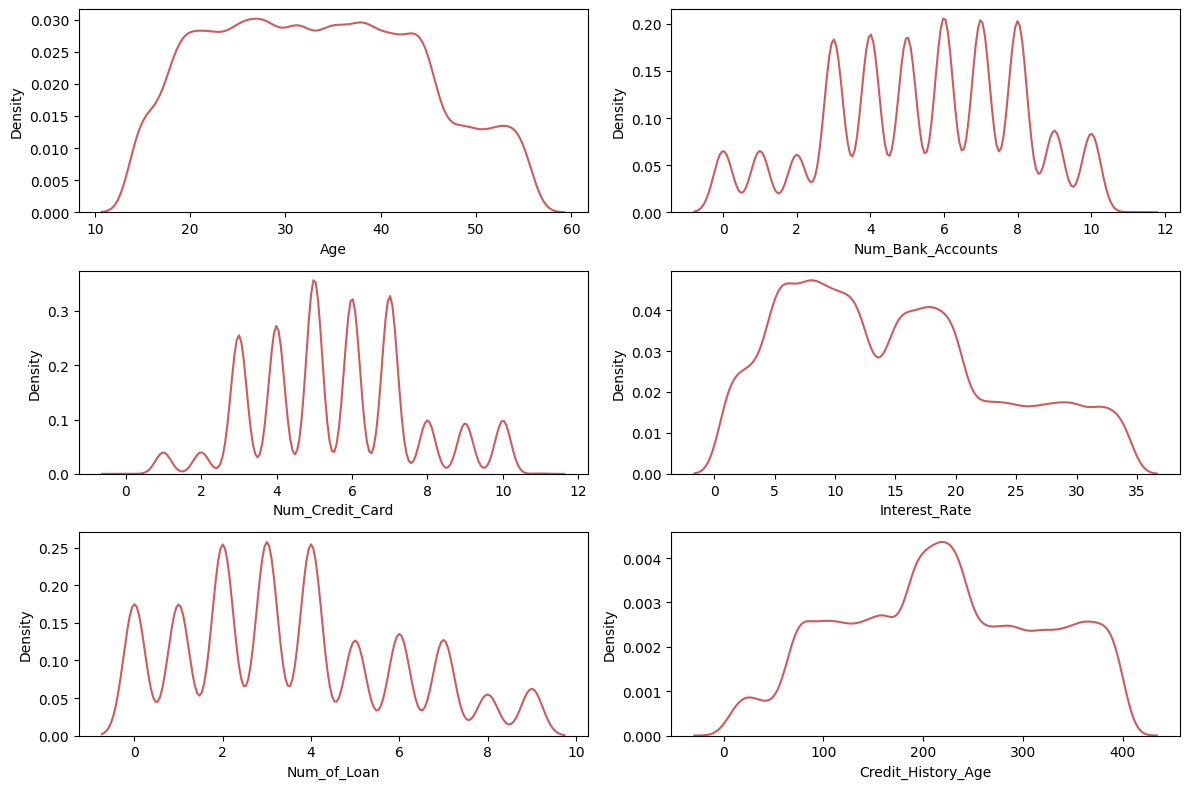

In [ ]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Credit_History_Age']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()


SCALING

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
columns_to_scale = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Credit_History_Age']

# Fit and transform the scaler on the selected columns
df_prep[columns_to_scale] = scaler.fit_transform(df_prep[columns_to_scale])


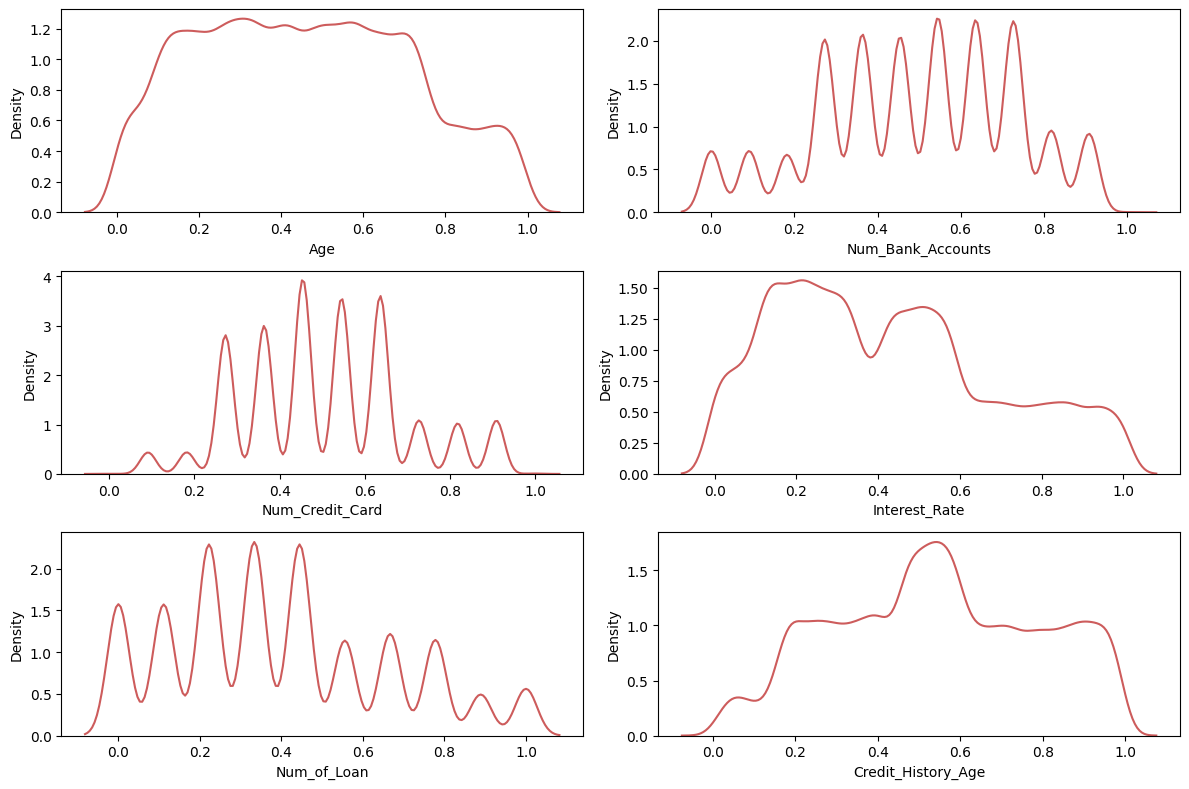

In [ ]:
# distribution of data after scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Credit_History_Age']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df_prep[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [ ]:
#FEATURE   SELECTION
# Initialize VarianceThreshold with a threshold value ( 0.01)
threshold_value = 0.01
variance_threshold = VarianceThreshold(threshold=threshold_value)

# Fit VarianceThreshold to your training data
variance_threshold.fit(X_train_temp)

# Get the indices of features with variance greater than the threshold
selected_indices = variance_threshold.get_support(indices=True)

# Get the names of selected features
selected_features = X_train_temp.columns[selected_indices]

# Transform your training data to include only the selected features
X_train_selected = variance_threshold.transform(X_train_temp)

# Transform your validation and test data accordingly
X_val_selected = variance_threshold.transform(X_val)
X_test_selected = variance_threshold.transform(X_test)


In [ ]:
print(X_train_temp.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')


In [ ]:
# Define numerical columns
nume_cols = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Credit_History_Age']

# Initialize SelectKBest with f_classif scoring and k=4
classif = SelectKBest(score_func=f_classif, k=4)

# Fit SelectKBest to the training data
classif.fit(X_train_temp[nume_cols], y_train_temp)

# Get the mask of selected features
selected_mask = classif.get_support()

# Get the names of selected features
selected_features_numerical = [nume_cols[i] for i, mask in enumerate(selected_mask) if mask]
print("Selected Features:", selected_features_numerical)


Selected Features: ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Credit_History_Age']


In [ ]:
cat_cols=['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount',
    'Payment_Behaviour_High_spent_Medium_value_payments',
    'Payment_Behaviour_High_spent_Small_value_payments',
    'Payment_Behaviour_Low_spent_Large_value_payments',
    'Payment_Behaviour_Low_spent_Medium_value_payments',
    'Payment_Behaviour_Low_spent_Small_value_payments']
# Ensure all values in the input features are non-negative
X_train_temp_abs = np.abs(X_train_temp[cat_cols])

# Initialize SelectKBest with chi2 scoring and k=3 (or the desired number of features)
classif = SelectKBest(score_func=chi2, k=3)

# Fit SelectKBest to the training data
classif.fit(X_train_temp_abs, y_train_temp)

# Get the mask of selected features
selected_mask = classif.get_support()

# Get the names of selected features
selected_features_categorical = [cat_cols[i] for i, mask in enumerate(selected_mask) if mask]

print("Selected Features:", selected_features_categorical)


Selected Features: ['Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount']


In [ ]:
# Concatenate the lists of selected features
all_selected_features = selected_features_numerical + selected_features_categorical

# Print the merged selected features
print("Merged Selected Features:", all_selected_features)


Merged Selected Features: ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Credit_History_Age', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount']


In [ ]:
# Create a DataFrame with the merged selected features
selected_features_df = pd.DataFrame({
    'Selected_Features': all_selected_features
})

# Print the DataFrame with the merged selected features
print(selected_features_df)


       Selected_Features
0      Num_Bank_Accounts
1        Num_Credit_Card
2          Interest_Rate
3     Credit_History_Age
4           Type_of_Loan
5             Credit_Mix
6  Payment_of_Min_Amount


HANDLING IMBALANCE DATA

In [ ]:
# Print original training data information
print(f'The amount of training data before SMOTE consists of {len(X_train_temp)} rows')
print(f'Number of class 0 in training data: {sum(y_train_temp==0)}')
print(f'Number of class 1 in training data: {sum(y_train_temp==1)}\n')

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_temp, y_train_temp = smote.fit_resample(X_train_temp, y_train_temp)

# Print resampled training data information
print(f'Amount of training data after SMOTE consisting of {len(X_train_temp)} rows')
print(f'Number of class 0 in resampled training data: {sum(y_train_temp==0)}')
print(f'Number of class 1 in resampled training data: {sum(y_train_temp==1)}\n')


The amount of training data before SMOTE consists of 66210 rows
Number of class 0 in training data: 11112
Number of class 1 in training data: 35386

Amount of training data after SMOTE consisting of 106158 rows
Number of class 0 in resampled training data: 35386
Number of class 1 in resampled training data: 35386



In [ ]:
c=pd.DataFrame(X_train_temp, y_train_temp)
c

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
Credit_Score,,,,,,,,,,,,,,,,,,,,,
1,5,54.0,5,17321.505,1361.45875,6.0,7.0,13.0,1.0,3364,...,368.0,-1,14.369364,27.898381,231.656527,0,0,0,0,1
1,5,54.0,5,17321.505,1361.45875,6.0,7.0,13.0,1.0,3364,...,368.0,-1,14.369364,27.898381,231.656527,0,0,0,0,1
2,2,18.0,4,73378.320,5832.86000,7.0,8.0,26.0,5.0,4244,...,122.0,1,187.072950,43.031320,458.555713,1,0,0,0,0
1,5,54.0,5,17321.505,1361.45875,6.0,7.0,13.0,1.0,3364,...,368.0,-1,14.369364,27.898381,231.656527,0,0,0,0,1
1,5,54.0,5,17321.505,1361.45875,6.0,7.0,13.0,1.0,3364,...,368.0,-1,14.369364,27.898381,231.656527,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,18.0,4,73378.320,5832.86000,7.0,8.0,26.0,5.0,4244,...,122.0,1,187.072950,43.031320,458.555713,1,0,0,0,0
2,2,18.0,4,73378.320,5832.86000,7.0,8.0,26.0,5.0,4244,...,122.0,1,187.072950,43.031320,458.555713,1,0,0,0,0
2,2,18.0,4,73378.320,5832.86000,7.0,8.0,26.0,5.0,4244,...,122.0,1,187.072950,43.031320,458.555713,1,0,0,0,0


In [ ]:
# Save preprocessed training data into a CSV file named 'Credit_Preprocessing_train.csv' without including the index
X_train_temp.to_csv('Credit_Preprocessing_train.csv', index=False)

# Save preprocessed testing data into a CSV file named 'Credit_Preprocessing_test.csv' without including the index
X_test.to_csv('Credit_Preprocessing_test.csv', index=False)


# Machine Learning Modelling & Evaluation

Here we will use 7features resulting from feature selection using variance threshold, fclassif and chi square

# MODEL SELECTION

In [ ]:
# Set function for confusion matrix
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)

    # Replace tick labels
    ax.xaxis.set_ticklabels(['Poor', 'Good', 'Standard'])
    ax.yaxis.set_ticklabels(['Poor', 'Good', 'Standard'])

    plt.show()

    print(f'From the {title} model it is found that:')
    print(f'- Total TP (True Positive) = {cm[1][1]}')
    print(f'- Total TN (True Negative) = {cm[0][0]}')
    print(f'- Total FP (False Positive) = {cm[0][1]}')
    print(f'- Total FN (False Negative) = {cm[1][0]}')



**1.Logistic Regression**

Accuracy (Logistic Regression with Scaling): 0.6354922827542463


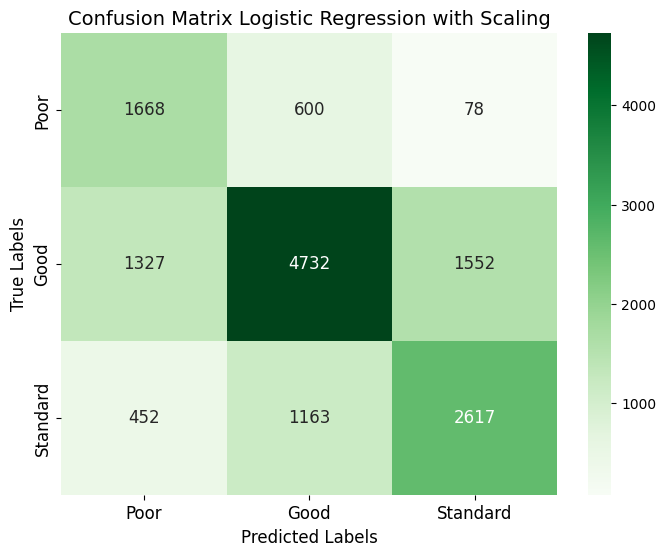

From the Logistic Regression with Scaling model it is found that:
- Total TP (True Positive) = 4732
- Total TN (True Negative) = 1668
- Total FP (False Positive) = 600
- Total FN (False Negative) = 1327


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train_temp)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model using scaled features
model_lr_scaled = LogisticRegression(random_state=42)
model_lr_scaled.fit(X_train_scaled, y_train_temp)

# Make predictions
y_pred_lr_scaled = model_lr_scaled.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_lr_scaled)
print("Accuracy (Logistic Regression with Scaling):", accuracy)

# Plot Confusion Matrix
plotting_confusion_matrix(model_lr_scaled, X_test_scaled, y_test, title='Logistic Regression with Scaling')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


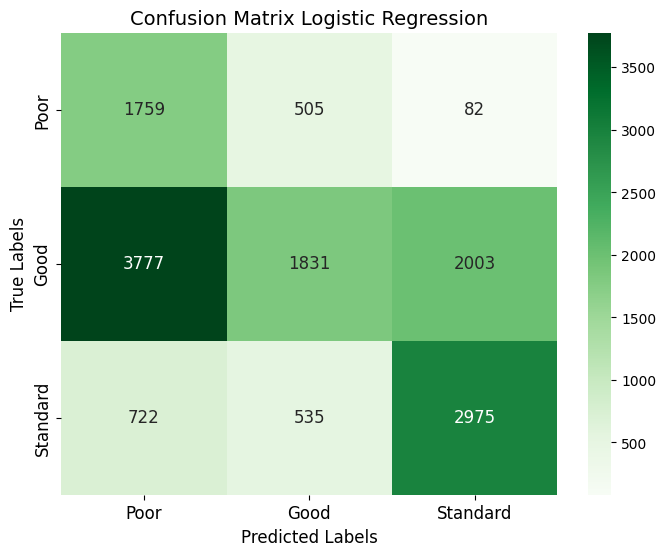

From the Logistic Regression model it is found that:
- Total TP (True Positive) = 1831
- Total TN (True Negative) = 1759
- Total FP (False Positive) = 505
- Total FN (False Negative) = 3777


In [ ]:
# Create and train the logistic regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_temp, y_train_temp)

# Plot the confusion matrix for the logistic regression model
plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')


**2.KNN**

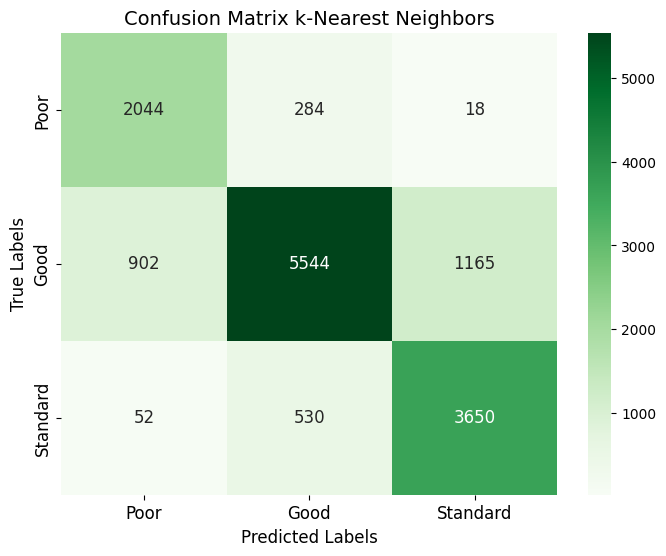

From the k-Nearest Neighbors model it is found that:
- Total TP (True Positive) = 5544
- Total TN (True Negative) = 2044
- Total FP (False Positive) = 284
- Total FN (False Negative) = 902


In [ ]:
# Create an instance of the k-NN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the k-NN classifier
model_knn.fit(X_train_temp, y_train_temp)

# Make predictions on the testing data
y_pred_knn = model_knn.predict(X_test)

# Evaluate the performance of the k-NN classifier
plotting_confusion_matrix(model_knn, X_test, y_test, title='k-Nearest Neighbors')



**3.Decision Tree**

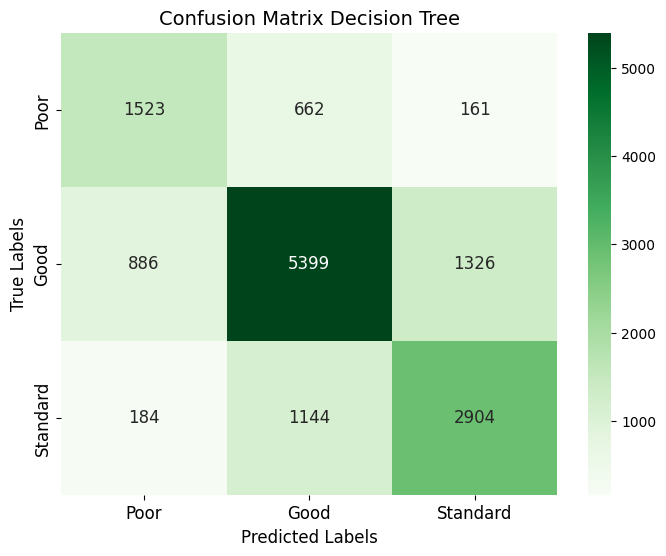

From the Decision Tree model it is found that:
- Total TP (True Positive) = 5399
- Total TN (True Negative) = 1523
- Total FP (False Positive) = 662
- Total FN (False Negative) = 886


In [ ]:
# Create and train the Decision Tree classifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_temp, y_train_temp)

# Plot the confusion matrix for the Decision Tree classifier
plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')


**4.Random Forest**

In [ ]:
# Create and train the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_temp, y_train_temp)

# Plot the confusion matrix for the Random Forest classifier
plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')


In [ ]:
# accuracy,precision,recall,f1,mcc,auc_test,auc_train checking function definition
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred, average='macro'), 4)
    recall = round(recall_score(y_test, y_pred, average='macro'), 4)
    f1 = round(f1_score(y_test, y_pred, average='macro'), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr'), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train, average='macro', multi_class='ovr'), 4)

    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train_temp, y_train_temp, X_test, y_test):
    model_name = ['Logistic Regression',,'kNN','Decision Tree','Random Forest']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']

    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train_temp, y_train_temp, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)

    return df_model


In [ ]:
# Assuming model_lr, model_dt, and model_rf are previously trained models
model_list_base = [model_lr, model_dt, model_rf,model_knn]

score_all_classification(model_list_base, X_train_temp, y_train_temp, X_test, y_test)


,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.4650,0.5052,0.5686,0.4680,0.2888,0.6772,0.7040
1,Decision Tree,0.7063,0.6774,0.6880,0.6823,0.5108,0.7615,1.0000
2,Random Forest,0.8026,0.7753,0.8082,0.7890,0.6781,0.9202,1.0000
3,kNN,0.7897,0.7653,0.8191,0.7844,0.6689,0.9096,0.9834


From the evaluation results of the 7 models, it was found that:

The Logistic Regression model was able to produce sufficient accuracy
The Decision Tree model is able to produce quite high accuracy, namely 70
The Random Forest model is able to produce very high accuracy, namely 80

So it can be concluded from the 7 models selected, while the Random Forest Model is the best base model, we still have to carry out further tuning to avoid overfitting.